In [1]:
!pip install nlp

In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd


In [5]:
data = pd.read_pickle("merged_training.pkl")

In [6]:
data

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love
...,...,...
566,that was what i felt when i was finally accept...,joy
36236,i take every day as it comes i m just focussin...,fear
76229,i just suddenly feel that everything was fake,sadness
131640,im feeling more eager than ever to claw back w...,joy


In [8]:
import matplotlib.pyplot as plt


In [9]:
emotion_counts = data['emotions'].value_counts()
emotion_counts

emotions
joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: count, dtype: int64

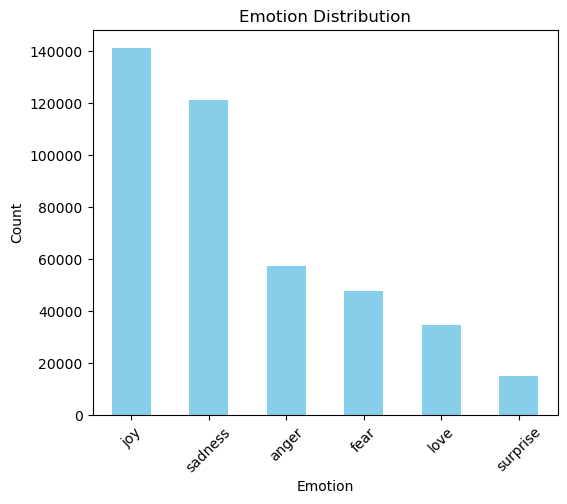

In [10]:
plt.figure(figsize=(6, 5))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the emotion labels for readability
plt.show()

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [13]:
max_words = 10000  # Define the maximum number of words to consider

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])

In [14]:
sequences = tokenizer.texts_to_sequences(data['text'])

In [16]:
max_sequence_length = 100  # Define the maximum sequence length
X = pad_sequences(sequences, maxlen=max_sequence_length)

In [17]:
emotions = data['emotions']
y = pd.get_dummies(emotions).values

In [18]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create and train the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(y.shape[1], activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
4169/4169 [==============================] - 922s 220ms/step - loss: 0.2041 - accuracy: 0.9055 - val_loss: 0.1005 - val_accuracy: 0.9383
Epoch 2/10
4169/4169 [==============================] - 925s 222ms/step - loss: 0.0982 - accuracy: 0.9386 - val_loss: 0.0963 - val_accuracy: 0.9393
Epoch 3/10
4169/4169 [==============================] - 850s 204ms/step - loss: 0.0924 - accuracy: 0.9404 - val_loss: 0.0960 - val_accuracy: 0.9384
Epoch 4/10
4169/4169 [==============================] - 852s 204ms/step - loss: 0.0877 - accuracy: 0.9419 - val_loss: 0.0950 - val_accuracy: 0.9384
Epoch 5/10
4169/4169 [==============================] - 851s 204ms/step - loss: 0.0847 - accuracy: 0.9432 - val_loss: 0.0965 - val_accuracy: 0.9394
Epoch 6/10
4169/4169 [==============================] - 855s 205ms/step - loss: 0.0827 - accuracy: 0.9444 - val_loss: 0.0956 - val_accuracy: 0.9345
Epoch 7/10
4169/4169 [==============================] - 885s 212ms/step - loss: 0.0810 - accuracy: 0.9457 - val_

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

2606/2606 [==============================] - 163s 63ms/step - loss: 0.1108 - accuracy: 0.9250
Test Loss: 0.1108, Test Accuracy: 0.9250


In [23]:
model.save('your_model.h5')

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

2606/2606 [==============================] - 159s 60ms/step


In [27]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

In [28]:
cm        

array([[10411,   353,    36,     0,   539,     0],
       [  329,  8251,    16,     0,   339,   441],
       [   47,    17, 26247,  1739,    35,   162],
       [    1,     2,   893,  5955,     1,     1],
       [  242,   279,    30,     1, 23932,    20],
       [    0,   546,   176,     0,     9,  2312]], dtype=int64)

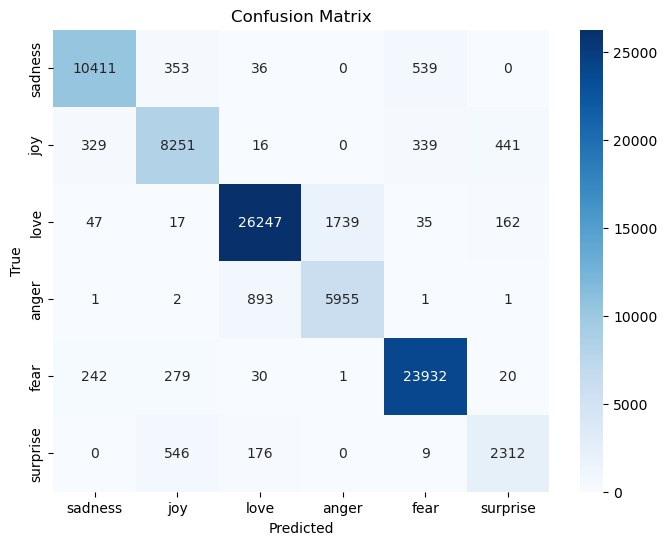

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions.unique(), yticklabels=emotions.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.metrics import classification_report

# Assuming you have the true and predicted labels in 'y_test_classes' and 'y_pred_classes'
report = classification_report(y_test_classes, y_pred_classes, target_names=emotions.unique())
print(report)

              precision    recall  f1-score   support

     sadness       0.94      0.92      0.93     11339
         joy       0.87      0.88      0.88      9376
        love       0.96      0.93      0.94     28247
       anger       0.77      0.87      0.82      6853
        fear       0.96      0.98      0.97     24504
    surprise       0.79      0.76      0.77      3043

    accuracy                           0.92     83362
   macro avg       0.88      0.89      0.89     83362
weighted avg       0.93      0.92      0.93     83362



In [31]:
sample_idx = 0  # Change this to any index you want to visualize
print(f"Predicted Emotion: {emotions.unique()[y_pred_classes[sample_idx]]}")
print(f"True Emotion: {emotions.unique()[y_test_classes[sample_idx]]}")
print(f"Text: {data['text'].iloc[sample_idx]}")

Predicted Emotion: fear
True Emotion: joy
Text: i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here


In [32]:
sample_idx1 = 75  
print(f"Predicted Emotion: {emotions.unique()[y_pred_classes[sample_idx1]]}")
print(f"True Emotion: {emotions.unique()[y_test_classes[sample_idx1]]}")
print(f"Text: {data['text'].iloc[sample_idx1]}")

Predicted Emotion: joy
True Emotion: joy
Text: when my kid brother broke my reading spectacles


In [ ]:
sample_idx2 = 57
print(f"Predicted Emotion: {emotions.unique()[y_pred_classes[sample_idx2]]}")
print(f"True Emotion: {emotions.unique()[y_test_classes[sample_idx2]]}")
print(f"Text: {data['text'].iloc[sample_idx2]}")

In [ ]:
from flask import Flask, render_template, request
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load the model
model = load_model('your_model.h5')

# Initialize Flask app
app = Flask(__name__)

# Define emotion labels
emotion_labels = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear' ,
    5: 'suprise'
    # Add more labels as needed
}

# Define routes
@app.route('/')
def index():
    return """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Sentiment Analysis</title>
    </head>
    <body>
        <h2>Sentiment Analysis</h2>
        <form action="/predict" method="post">
            <label for="text">Enter Text:</label><br>
            <textarea id="text" name="text" rows="4" cols="50"></textarea><br>
            <input type="submit" value="Submit">
        </form>
    </body>
    </html>
    """

@app.route('/predict', methods=['POST'])
def predict():
    # Get input text from the form
    text = request.form['text']

    # Tokenize and pad the input text
    # Replace this part with your actual tokenization and padding logic
    # For example, you can use the same preprocessing you used for training
    max_sequeance_length = 100 # Assuming this is your maximum sequence length
    text_sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(text_sequence, maxlen=max_sequeance_length)

    # Make prediction
    prediction = model.predict(padded_sequence)
    # Assuming prediction is a one-hot encoded vector

    # Process the prediction result (you may need to adjust this based on your model output)
    # Here we are assuming the prediction is a one-hot encoded vector
    predicted_class = np.argmax(prediction)

    # Get the corresponding emotion label
    predicted_emotion = emotion_labels.get(predicted_class, 'Unknown')

    # Render the result template with the prediction
    return f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Prediction Result</title>
    </head>
    <body>
        <h2>Prediction Result</h2>
        <p>The predicted emotion is: {predicted_emotion}</p>
    </body>
    </html>
    """

# Run the app
if __name__ == '__main__':
    app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [14/Mar/2024 20:00:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2024 20:00:20] "GET /favicon.ico HTTP/1.1" 404 -


1/1 [==============================] - 2s 2s/step


127.0.0.1 - - [14/Mar/2024 20:01:25] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 46ms/step


127.0.0.1 - - [14/Mar/2024 20:12:14] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 70ms/step


127.0.0.1 - - [14/Mar/2024 20:16:09] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 70ms/step


127.0.0.1 - - [14/Mar/2024 20:16:48] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 40ms/step


127.0.0.1 - - [14/Mar/2024 20:17:49] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 35ms/step


127.0.0.1 - - [14/Mar/2024 20:18:37] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 49ms/step


127.0.0.1 - - [14/Mar/2024 20:21:49] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 82ms/step


127.0.0.1 - - [14/Mar/2024 20:22:01] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 82ms/step


127.0.0.1 - - [14/Mar/2024 20:22:50] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 80ms/step


127.0.0.1 - - [14/Mar/2024 20:23:02] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 55ms/step


127.0.0.1 - - [14/Mar/2024 20:23:27] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 70ms/step


127.0.0.1 - - [14/Mar/2024 20:23:40] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 72ms/step


127.0.0.1 - - [14/Mar/2024 20:24:05] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 49ms/step


127.0.0.1 - - [14/Mar/2024 20:24:30] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 74ms/step


127.0.0.1 - - [14/Mar/2024 20:25:38] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 82ms/step


127.0.0.1 - - [14/Mar/2024 20:26:15] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 81ms/step


127.0.0.1 - - [14/Mar/2024 20:26:43] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 74ms/step


127.0.0.1 - - [14/Mar/2024 20:26:58] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 74ms/step


127.0.0.1 - - [14/Mar/2024 20:27:13] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 76ms/step


127.0.0.1 - - [14/Mar/2024 20:27:28] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 81ms/step


127.0.0.1 - - [14/Mar/2024 20:28:28] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 82ms/step


127.0.0.1 - - [14/Mar/2024 20:31:28] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 35ms/step


127.0.0.1 - - [14/Mar/2024 20:32:14] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 68ms/step


127.0.0.1 - - [14/Mar/2024 20:32:49] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 55ms/step


127.0.0.1 - - [14/Mar/2024 20:34:07] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 69ms/step


127.0.0.1 - - [14/Mar/2024 20:34:36] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 81ms/step


127.0.0.1 - - [14/Mar/2024 20:35:13] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 72ms/step


127.0.0.1 - - [14/Mar/2024 20:35:20] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 74ms/step


127.0.0.1 - - [14/Mar/2024 20:36:01] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 68ms/step


127.0.0.1 - - [14/Mar/2024 20:36:34] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 73ms/step


127.0.0.1 - - [14/Mar/2024 20:37:07] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2024 20:39:32] "GET / HTTP/1.1" 200 -


1/1 [==============================] - 0s 73ms/step


127.0.0.1 - - [14/Mar/2024 20:40:19] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 68ms/step


127.0.0.1 - - [14/Mar/2024 20:40:50] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 68ms/step


127.0.0.1 - - [14/Mar/2024 20:41:23] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 49ms/step


127.0.0.1 - - [14/Mar/2024 20:41:34] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 82ms/step


127.0.0.1 - - [14/Mar/2024 20:41:45] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 72ms/step


127.0.0.1 - - [14/Mar/2024 20:41:52] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 76ms/step


127.0.0.1 - - [14/Mar/2024 20:42:09] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 34ms/step


127.0.0.1 - - [14/Mar/2024 20:42:54] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 71ms/step


127.0.0.1 - - [14/Mar/2024 20:43:53] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 69ms/step


127.0.0.1 - - [14/Mar/2024 20:44:41] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 77ms/step


127.0.0.1 - - [14/Mar/2024 20:45:01] "POST /predict HTTP/1.1" 200 -
